# Download dataset

In [8]:
# ! rm -r data
# ! rm annotations.zip
# ! wget https://propaganda.math.unipd.it/semeval2024task4/data/annotations.zip
! unzip annotations.zip

Archive:  annotations.zip
   creating: data/
   creating: data/subtask1/
  inflating: data/subtask1/dev_unlabeled.json  
  inflating: data/subtask1/train.json  
  inflating: data/subtask1/validation.json  
   creating: data/subtask2a/
  inflating: data/subtask2a/dev_unlabeled.json  
  inflating: data/subtask2a/train.json  
  inflating: data/subtask2a/validation.json  
   creating: data/subtask2b/
  inflating: data/subtask2b/dev_unlabeled.json  
  inflating: data/subtask2b/train.json  
  inflating: data/subtask2b/val.json  


# Imports

In [9]:
import matplotlib.pyplot as plt
import json
from collections import Counter

# Read dataset and store them in variables

In [10]:
with open('data/subtask1/train.json', 'r') as f:
  data = json.load(f)

train_x = [sample['text'] for sample in data]
train_y = [sample['labels'] for sample in data]

In [11]:
print(data[0])
print(f'number of examples in dataset: {len(train_x)}')

{'id': '65635', 'text': 'THIS IS WHY YOU NEED\\n\\nA SHARPIE WITH YOU AT ALL TIMES', 'labels': ['Black-and-white Fallacy/Dictatorship'], 'link': 'https://www.facebook.com/photo/?fbid=4023552137722493&set=g.633131750534436'}
number of examples in dataset: 7000


# Analysis Labels and Tags

In [12]:
tag_counter = {}
for label in train_y:
  for tag in label:
    tag_counter[tag] = tag_counter.get(tag, 0) + 1

In [13]:
tag_names = sorted(list(tag_counter.keys()))
ix2tag = {i:tag_names[i] for i in range(len(tag_names))}
tag2ix = {tag_names[i]:i for i in range(len(tag_names))}

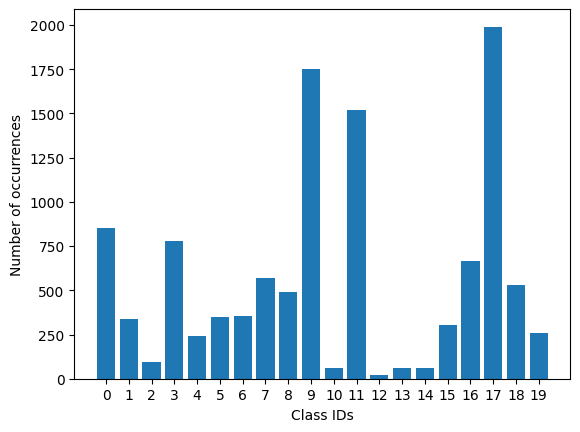

0 --> Appeal to authority
1 --> Appeal to fear/prejudice
2 --> Bandwagon
3 --> Black-and-white Fallacy/Dictatorship
4 --> Causal Oversimplification
5 --> Doubt
6 --> Exaggeration/Minimisation
7 --> Flag-waving
8 --> Glittering generalities (Virtue)
9 --> Loaded Language
10 --> Misrepresentation of Someone's Position (Straw Man)
11 --> Name calling/Labeling
12 --> Obfuscation, Intentional vagueness, Confusion
13 --> Presenting Irrelevant Data (Red Herring)
14 --> Reductio ad hitlerum
15 --> Repetition
16 --> Slogans
17 --> Smears
18 --> Thought-terminating cliché
19 --> Whataboutism


In [18]:
bar_labels = [str(i) for i in range(len(tag_names))]
bar_values = [tag_counter[ix2tag[int(ix)]] for ix in bar_labels]
plt.bar(range(len(tag_names)), bar_values, tick_label=bar_labels)
plt.xlabel('Class IDs')
plt.ylabel('Number of occurrences')
plt.show()
_ = [print(f'{i} --> {ix2tag[i]}') for i in range(len(ix2tag))]

In [ ]:
tags_per_label = {}
for label in train_y:
  n = len(label)
  tags_per_label[n] = tags_per_label.get(n, 0) + 1

tags_per_label = dict(sorted(tags_per_label.items()))

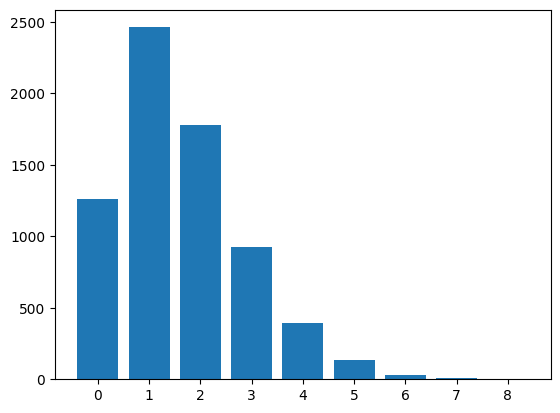

In [ ]:
plt.bar(range(len(tags_per_label)), list(tags_per_label.values()), tick_label=list(tags_per_label.keys()))
plt.show()

# Analysis Meme Texts

In [ ]:
print(*train_x[:10], sep='\n')

THIS IS WHY YOU NEED\n\nA SHARPIE WITH YOU AT ALL TIMES
GOOD NEWS!\n\nNAZANIN ZAGHARI-RATCLIFFE AND ANOOSHEH ASHOORI HAVE BEEN RELEASED\n\nAfter years of being unjustly detained in Iran, they are making their way safely back to the UK.
PAING PHYO MIN IS FREE!
Move your ships away!\n\noooook\n\nMove your ships away!\n\nNo, and I just added 10 more
WHEN YOU'RE THE FBI, THEY LET YOU DO IT.
PUTIN'S SECRET CAMOUFLAGE ARMY
JANUARY 2021\n\nYOU DON'T BUY A 12 MILLION DOLLAR WATERFRONT HOUSE ON MARTHA'S VINEYARD IF YOU REALLY BELIEVE THE OCEANS ARE RISING.
Term Limits Are Everywhere & Politicians Can't Ignore It\n\nTERM LIMITS AHEAD
Nicola Sturgeon\n\nWE'RE SCOTTISH GETUSOUTOFHERE!\n\nWill his bushtucker trial involve skydiving into the jungle without the appropriate PPE
I saw a movie once where only the police and military had guns.\n\nIt was called Schindler's List.


In [ ]:
lengths = [len(x) for x in train_x]
length_counter = Counter(lengths)
length_counter = dict(sorted(length_counter.items()))


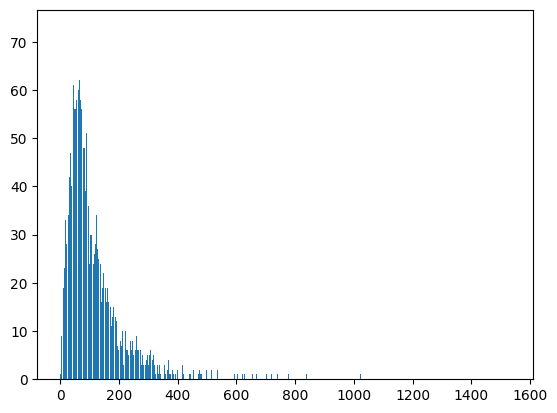

In [ ]:
plt.bar(length_counter.keys(), length_counter.values())
plt.show()